In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/it-service-ticket-classification-dataset/all_tickets_processed_improved_v3.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/it-service-ticket-classification-dataset/all_tickets_processed_improved_v3.csv')

In [5]:
df.head(10)

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous
5,mail please dear looks blacklisted receiving m...,Miscellaneous
6,prod servers tunneling prod tunneling va la tu...,Hardware
7,access request dear modules report report cost...,HR Support
8,reset passwords for our client and passwords c...,Access
9,direct reports missing time please action repo...,HR Support


In [6]:
df.tail(10)

,Document,Topic_group
47827,bandwidth problems sent thursday july bandwidt...,Hardware
47828,your password expire days sent july re your pa...,Access
47829,sensitive information access sent wednesday ju...,Storage
47830,malfunction sent tuesday july re malfunction h...,Hardware
47831,cannot on outlook account from laptop cannot l...,Administrative rights
47832,git space for a project issues with adding use...,Access
47833,error sent july error hi guys can you help out...,Miscellaneous
47834,connection issues sent tuesday july connection...,Hardware
47835,error cube reports sent tuesday july error hel...,HR Support
47836,running out on extensions hello please be advi...,Hardware


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [21]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

Document       0
Topic_group    0
dtype: int64

In [9]:
data_np = df.to_numpy()

In [10]:
data_np

array([['connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead',
        'Hardware'],
       ['work experience user work experience user hi work experience student coming next his name much appreciate him duration thank',
        'Access'],
       ['requesting for meeting requesting meeting hi please help follow equipments cable pc cord plug',
        'Hardware'],
       ...,
       ['connection issues sent tuesday july connection issues hello have connection issues while working client side link connection type cable en using applications excel word explorer very slow with delays while moving mouse or clicking constant problem but today slower than usual impacting our work same for colleagues working problem have previously reported please advise thank you senior analyst ext',
        'Hardware'],
       ['error cube reports sent tuesday july error hello guys have received error when was trying export some reports status cube r

In [12]:
print(data_np.dtype)

object


In [15]:
data_np.shape

(47837, 2)

In [22]:
print(df.columns)

Index(['Document', 'Topic_group'], dtype='object')


In [23]:
import numpy as np

# Check for missing values again, adjusting the approach for object dtype
missing_values_text = df['Document'].isnull().sum()
missing_values_topic = df['Topic_group'].isnull().sum()

In [24]:
missing_values_text

0

In [25]:
missing_values_topic

0

In [26]:
df['Document'].value_counts()

Document
connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead                                                                                                                                                                                                                                                                                                                                                                                                                 1
received block sender tuesday received hello please thank technical consultant pm right bubbling top busy appreciate thoughts representative how works want connect find suits calendar                                                                                                                                                                                                                                                                                                      

In [27]:
df['Topic_group'].value_counts()

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

Category Distribution: The dataset is dominated by "Hardware" and "HR Support" tickets, suggesting these are common topics for support tickets in this dataset.

Document Length: The average document length indicates that most tickets are relatively brief, which is typical for support ticket data.

In [28]:
# Category distribution
category_distribution = df['Topic_group'].value_counts()

In [29]:
category_distribution

Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64

In [30]:
# Basic text statistics - Average document length in terms of words
average_doc_length = df['Document'].apply(lambda x: len(x.split())).mean()

In [31]:
average_doc_length

43.597340970378575

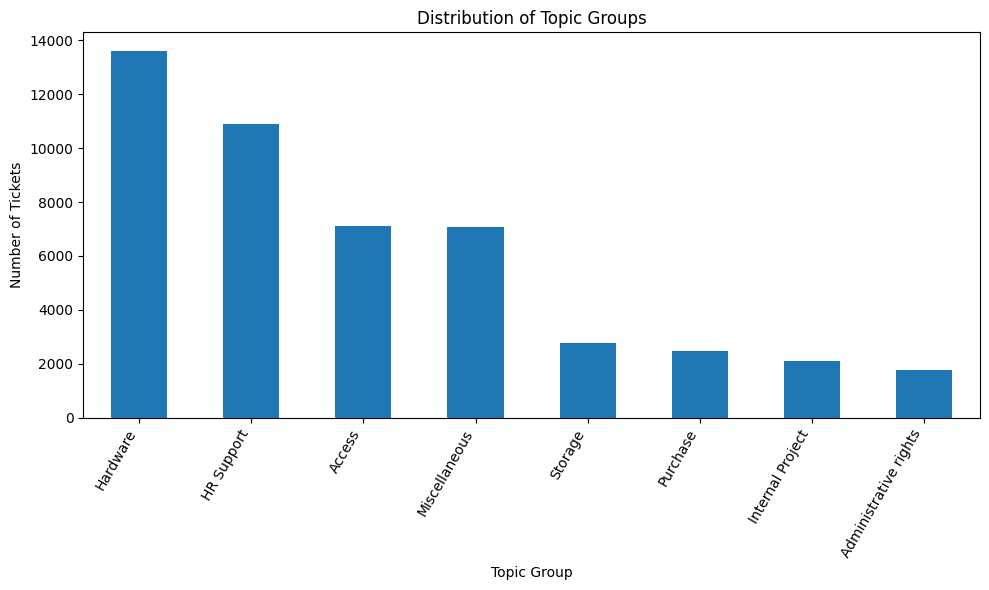

In [33]:
import matplotlib.pyplot as plt

# Plotting the category distribution

plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar')
plt.title('Distribution of Topic Groups')
plt.xlabel('Topic Group')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Text Preprocessing
# Note: The text seems to be already lowercase and punctuation seems minimal, so we'll mainly convert to TF-IDF.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Feature Extraction
X = tfidf_vectorizer.fit_transform(df['Document'])
y = df['Topic_group']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Model Evaluation
y_pred = logistic_model.predict(X_test)
report = classification_report(y_test, y_pred)

report

'                       precision    recall  f1-score   support\n\n               Access       0.91      0.87      0.89      1455\nAdministrative rights       0.85      0.70      0.77       342\n           HR Support       0.84      0.83      0.84      2107\n             Hardware       0.79      0.86      0.83      2760\n     Internal Project       0.90      0.79      0.84       451\n        Miscellaneous       0.80      0.82      0.81      1400\n             Purchase       0.96      0.88      0.92       497\n              Storage       0.92      0.86      0.89       556\n\n             accuracy                           0.84      9568\n            macro avg       0.87      0.83      0.85      9568\n         weighted avg       0.85      0.84      0.84      9568\n'

The Logistic Regression model, trained on the TF-IDF vectorized text, shows the following performance metrics on the test set:

- Accuracy: 84%
- Precision, Recall, F1-Score: Varied across different categories, indicating the model's ability to correctly identify the tickets' categories with a decent level of precision and recall.

Here's a summary for each category:

- Access: Precision - 91%, Recall - 87%, F1-Score - 89%
- Administrative rights: Precision - 85%, Recall - 70%, F1-Score - 77%
- HR Support: Precision - 84%, Recall - 83%, F1-Score - 84%
- Hardware: Precision - 79%, Recall - 86%, F1-Score - 83%
- Internal Project: Precision - 90%, Recall - 79%, F1-Score - 84%
- Miscellaneous: Precision - 80%, Recall - 82%, F1-Score - 81%
- Purchase: Precision - 96%, Recall - 88%, F1-Score - 92%
- Storage: Precision - 92%, Recall - 86%, F1-Score - 8

Generate the Word Cloud - highlights the most frequent words

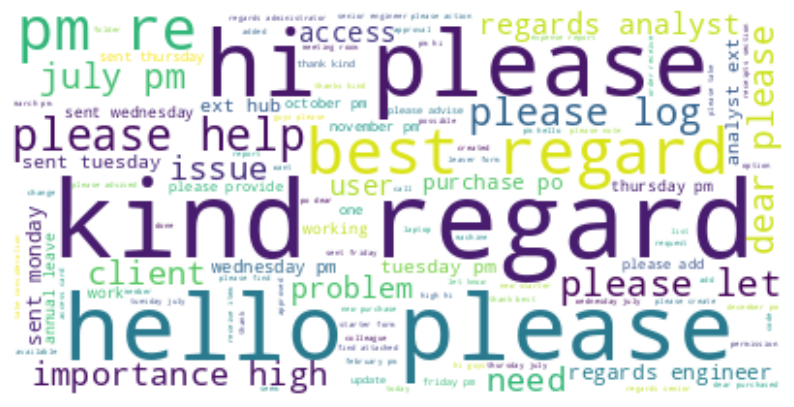

In [38]:
from wordcloud import WordCloud

# Combine all documents into one large text
all_text = " ".join(df['Document'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=2000, contour_width=3, contour_color='steelblue')

# Generate and display the word cloud
wordcloud.generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

N-gram Analysis

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example usage for bi-grams
top_bi_grams = get_top_ngrams(df['Document'], n=10, ngram_range=(2, 2))
print(top_bi_grams)

# For tri-grams, change ngram_range to (3, 3)
top_tri_grams = get_top_ngrams(df['Document'], n=10, ngram_range=(3, 3))
print(top_tri_grams)

[('kind regards', 12076), ('best regards', 7941), ('july pm', 3576), ('importance high', 3509), ('regards analyst', 3361), ('did leaver', 3104), ('regards engineer', 2762), ('thank kind', 2735), ('sent monday', 2685), ('purchase po', 2677)]
[('thank kind regards', 2706), ('kind regards analyst', 2070), ('analyst ext hub', 1965), ('thank best regards', 1941), ('regards analyst ext', 1858), ('kind regards administrator', 1827), ('thanks kind regards', 1559), ('importance high hi', 1403), ('po dear purchased', 1321), ('purchase po dear', 1276)]


Sentiment analysis using TextBlob

In [40]:
from textblob import TextBlob

df['Sentiment'] = df['Document'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Sentiment_Category'] = pd.cut(df['Sentiment'], bins=3, labels=["Negative", "Neutral", "Positive"])

# Quick overview of sentiment distribution
print(df['Sentiment_Category'].value_counts())

Sentiment_Category
Neutral     37650
Positive     9705
Negative      482
Name: count, dtype: int64


Latent Dirichlet Allocation (LDA) for topic modeling

In [41]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Preparing document-term matrix
count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['Document'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

# Fetching and displaying words for each topic
for i,topic in enumerate(LDA.components_):
    print(f"Top 10 words for topic #{i}:")
    print([count_vect.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")

Top 10 words for topic #0:
['starter', 'form', 'add', 'thanks', 'access', 'regards', 'hello', 'hi', 'thank', 'pm']


Top 10 words for topic #1:
['location', 'information', 'pm', 'hi', 'hello', 'regards', 'upgrade', 'did', 'site', 'leaver']


Top 10 words for topic #2:
['card', 'log', 'administrator', 'regards', 'report', 'la', 'pm', 'purchase', 'si', 'po']


Top 10 words for topic #3:
['assigned', 'kind', 'thanks', 'hello', 'code', 'thank', 'change', 'hi', 'regards', 'pm']


Top 10 words for topic #4:
['help', 'issues', 'thanks', 'thank', 'hello', 'regards', 'hi', 'issue', 'error', 'sent']




Interactive Visualizations with Plotly

In [42]:
import plotly.express as px

fig = px.histogram(df, x="Sentiment_Category")
fig.show()